# Exploratory Data Analysis on IMDb1000 movies dataset.

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
    - 3.5 [Final observations](#section305)
4. [Questions](#section4)
    - 4.1 [How has the movie industry changed over the 10 years period(2006-2016)?](#section401)<br/>
      -4.1.1 [Is the number of movies produced increasing over the years?](#section4011)<br/>
      -4.1.2 [Is the Revenue from movies increasing over the years?](#section4012)<br/>
      -4.1.3 [Is the Popularity of movies increasing over the years?](#section4013)<br/>
    - 4.2 [How does the Genre of a movie affect the outcome of the movie?](#section402)<br/>
      -4.2.1 [Does the total number of Genres in the movie affect the revenue, popularity, critical acclaim of the movie?](#section4021)<br/>
      -4.2.2 [Which Genre combination bring higher Revenue, higher rating and higher Metascore for a movie?](#section4022)<br/>
    - 4.3 [How does the runtime of movies affect the outcome of the movie?](#section403)<br/>
      -4.3.1 [Which interval of Runtime receives higher revenue,rating and metascore?](#section4031)<br/>
    - 4.4 [what is the impact of directors on the movie?](#section404)<br/>
      -4.4.1 [which director's movies receive higher Revenue?](#section4041)<br/>
      -4.4.2 [which director's movies receive higher Rating](#section4042)<br/>
      -4.4.3 [which director's movies receive higher Metascore](#section4043)<br/>
    - 4.5 [Relationship between Revenue, Rating and Metascore of movies](#section405)<br/>
5. [Conclusion](#section5)<br/>
6. [Actionable Insights](#section6)<br/>

<a id='section1'></a>
### 1. Problem Statement
> The purpose of the analysis is to find out the characteristics of movies that will help earn the best in terms of revenue, popularity and critical acclaim in the movie industry.


<a id='section2'></a>
### 2. Data Loading and Description

> The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.  
>IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

> Users registered on this site are  invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.

> It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.

> Below is the data dictionary explaining the various columns of the dataset

| Columns | Description     |
|---------|-----------------|
|   Rank  | Movie rank order|
| Title   |The title of the film|
|Genre    | A comma-separated list of genres used to classify the film|
|Description|Brief one-sentence movie summary|
|Director   |The name of the film's director|
|Actors     |A comma-separated list of the main stars of the film|
|Year       |The year that the film released as an integer.|
|Runtime (Minutes)|The duration of the film in minutes.|
|Rating|User rating for the movie 0-10|
|Votes|Number of votes|
|Revenue (Millions) | Movie revenue in millions|
|Metascore|An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|

### Importing packages

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
!pip install pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import warnings                                                    # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
from subprocess import check_output


     |████████████████████████████████| 133kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 614kB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 225kB 29.0MB/s eta 0:00:01


  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=148431 sha256=c9d544f48f9a27c5da64ce3b2559b98078e519affaed74dc86a93fcd08578b13
  Stored in directory: /home/nbuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=71e34357e21dc2c7f8b8979c7cbc2da9da04f5a40616a5c2ce1e06463c0104f2
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=19566 sha256=4df49b6fc903c102387801682420e9f48a24aa9da694559df8bf430d65c3aa78
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Fou

In [3]:
project_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")     # Importing training dataset using pd.read_csv
project_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


<a id='section3'></a>
### 3. Data Profiling



- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id='section301'></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [5]:
project_data.shape # This will print the number of rows and comlumns of the Data Frame

(1000, 12)

The project dataset has 1000 rows and 12 columns

In [6]:
project_data.columns #This will print the column names

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [7]:
project_data.head() #This will print the first n rows of the Data frame

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
project_data.tail() # This will print the last n rows of the data frame

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [9]:
project_data.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [10]:
project_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [11]:
project_data.isnull().sum() # this will count the number of missing values in each column

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

From the above output we can see that __Revenue(Millions)__ and __Metascore__ columns contains __null values__. We will see how to deal with them.

In [12]:
# Check for number of unique values for the column 'Title'
project_data.Title.nunique()

999

Unique 'Title' count is not equal to the number of rows of the dataset. Are there any duplicate movies ?

In [13]:
# Check for duplicate values in the column 'Title'
project_data.Title.duplicated().any()

True

In [14]:
# Find out the movies with duplicate 'Title'
project_data.loc[project_data.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


Two different movies with the same Title 'The Host' were released on 2006 and 2013 respectively. So no duplicate values.

<a id='section302'></a>
### 3.2 Pre Profiling

In [ ]:
import pandas as pd
import pandas_profiling
profile = pandas_profiling.ProfileReport(project_data)
profile.to_file(output_file="project_before_preprocessing.html")

### Initial observations:
- Summary of data types in this dataset:
- <em>Numeric</em>: <strong>7</strong> (integer & float)
- <em>Categorical</em>: Everything else
- <strong>comments</strong>-There are 192 missing values.The columns "Revenue(Millions)" and "Metascore" each have missing values '128' and '64' respectively. Since the percentage of rows that have missing values for "Revenue (Millions) is high(12.8%), the missing values need to be filled while the percentage of rows that have missing values in "Metascore" is low(6.4%) and is likely to be dropped.

<a id='section303'></a>
### 3.3 Preprocessing
Pre-pofiling output shows the distribution of "Revenue (Millions)" is right skewed(due to extreme values). So let's replace these missing values with the median value.
Dropping the rows that have missing values in the column "Metascore"

In [15]:
# Filling the missing values with the median value
median_revenue = project_data['Revenue (Millions)'].median()
project_data['Revenue (Millions)'].fillna(value=median_revenue, inplace=True)

In [16]:
# Check if there are anymore missing values
project_data['Revenue (Millions)'].isnull().any()

False

In [17]:
# Dropping the rows having missing values for 'Metascore'
project_data.dropna(subset=['Metascore'], inplace=True)

In [18]:
# Check if there are anymore missing values
project_data.Metascore.isnull().any()

False

In [19]:
# Check the new shape of the dataset
project_data.shape

(936, 12)

<a id='section304'></a>
### 3.4 Post-profiling

In [ ]:
# Using the pandas_profiling to generate report after pre-processing
import pandas_profiling
project_profile = pandas_profiling.ProfileReport(project_data)
project_profile.to_file(output_file="project_postprocessing.html")

### Final observations:
- Variables to transform prior to analysis:
 - <em>Setting the index of the DataFrame to movie title as the titles are unique.
 - <em>Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for ease of accessing columns.

In [20]:
# Set the index of the DataFrame to the movie 'Title'
project_data.set_index('Title', inplace=True)

In [21]:
# Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for ease of accessing columns
project_data.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [22]:
#Checking for incorrect datatype
project_data.dtypes

Rank             int64
Genre           object
Description     object
Director        object
Actors          object
Year             int64
Runtime          int64
Rating         float64
Votes            int64
Revenue        float64
Metascore      float64
dtype: object

In [23]:
# Check the head entries to see the changes
project_data.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [24]:
# Finally check for any missing values in the whole DataFrame
project_data.isnull().any().any()

False

### The dataset is now ready for EDA

<a id='section4'></a>
### 4. Questions & EDA


<a id='section401'></a>
#### 4.1 How has the movie industry changed over the 10 years period(2006-2016)?

<a id='section4011'></a>
#### 4.1.1 Is the number of movies produced increasing over the years?


In [25]:
#Determine the amount of movies that were produced each year, from 2006-2016
movies_year = project_data.groupby('Year')['Rank'].count()
movies_year

Year
2006     41
2007     46
2008     49
2009     49
2010     59
2011     58
2012     62
2013     86
2014     95
2015    123
2016    268
Name: Rank, dtype: int64

Text(0, 0.5, 'Movies Count')

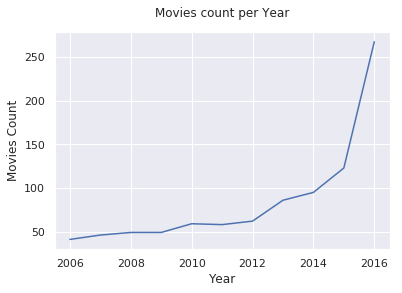

In [26]:
# Plot the movies count per year
ax = movies_year.plot.line();
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

The movies produced over the 10 years period is showing an upward trend.
There is a significant increase(more than twice) in the movies produced in  the year 2016 in compararision with the year 2015. 

<a id='section4012'></a>
#### 4.1.2 Is the revenue from movies increasing over the years ?

In [27]:
movies_revenue = project_data.groupby('Year')['Revenue'].sum()
movies_revenue.head()

Year
2006    3577.480
2007    4191.230
2008    4729.205
2009    5400.330
2010    6085.620
Name: Revenue, dtype: float64

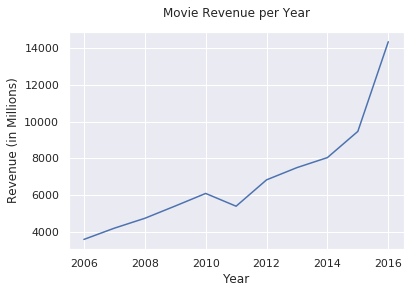

In [28]:
# Plot the Revenue for each year
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

The revenue from movies is seen to increase over the year although a slight decrease is observed in the year 2011. However this can be neglected as we are only considering the overall trend. A dramatic increase(more than double) of total revenue from movies is also seen in 2016 when compared with 2015.


#### Is the average revenue of the movies increasing over the years ?

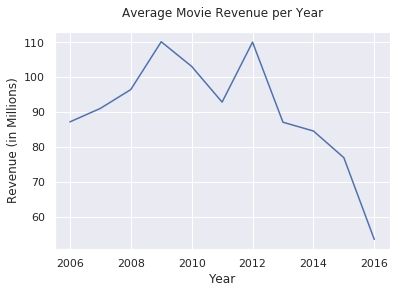

In [29]:
movies_avg_revenue = project_data.groupby('Year')['Revenue'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

The average revenue of movies is decreasing while the total revenue is increasing over the year. This is probably due to the fact that the total number of movies produced in a year is increasing.

<a id='section4013'></a>
#### 4.1.3 Is the Popularity of movies increasing over the years?

In [30]:
movies_rating = project_data.groupby('Year')['Rating'].mean()
movies_rating.head()

Year
2006    7.143902
2007    7.130435
2008    6.716327
2009    6.944898
2010    6.820339
Name: Rating, dtype: float64

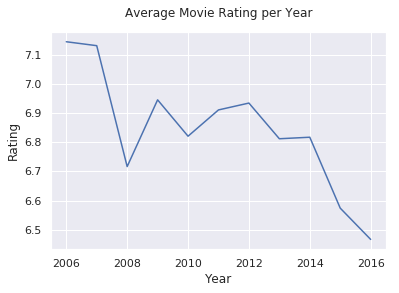

In [31]:
ax = movies_rating.plot.line();
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

In [32]:
movies_votes = project_data.groupby('Year')['Votes'].mean()
movies_votes.head()

Year
2006    277232.219512
2007    259157.717391
2008    262441.469388
2009    256690.142857
2010    255093.288136
Name: Votes, dtype: float64

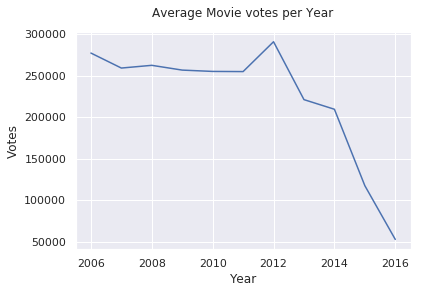

In [33]:
ax = movies_votes.plot.line();
ax.set_title('Average Movie votes per Year', y=1.04)
ax.set_ylabel('Votes');

In [34]:
movies_metascore = project_data.groupby('Year')['Metascore'].mean()
movies_metascore.head()

Year
2006    64.414634
2007    64.500000
2008    57.408163
2009    57.122449
2010    59.389831
Name: Metascore, dtype: float64

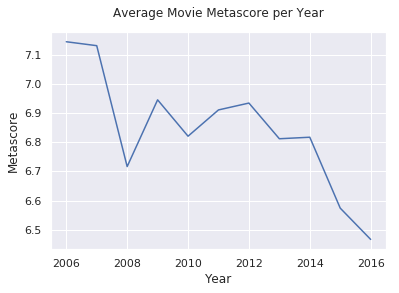

In [35]:
ax = movies_rating.plot.line();
ax.set_title('Average Movie Metascore per Year', y=1.04)
ax.set_ylabel('Metascore');

The popularity of movies in terms of IMDB rating and metascore is seen to be drastically decreasing over the years although the revenue of movies is increasing. Let us dig deeper and analyze the characteristics of movies in the dataset.

<a id='section402'></a>
#### 4.2 How does the Genre of a movie affect the outcome of the movie?

<a id='section4021'></a>
#### 4.2.1Does the total number of Genres in the movie affect the revenue, popularity, critical acclaim of the movie?

In [36]:
# The Genre column contains Genre combination as string separated by comma
project_data['Genre_count'] = project_data.Genre.str.split(',').str.len()

In [37]:
project_data.Genre_count.head()

Title
Guardians of the Galaxy    3
Prometheus                 3
Split                      2
Sing                       3
Suicide Squad              3
Name: Genre_count, dtype: int64

In [38]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = project_data.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].mean()
genre_count_stats

,Revenue,Rating,Metascore
Genre_count,,,
1,46.641848,6.365217,58.793478
2,55.710591,6.695455,58.677273
3,94.583734,6.794712,59.121795


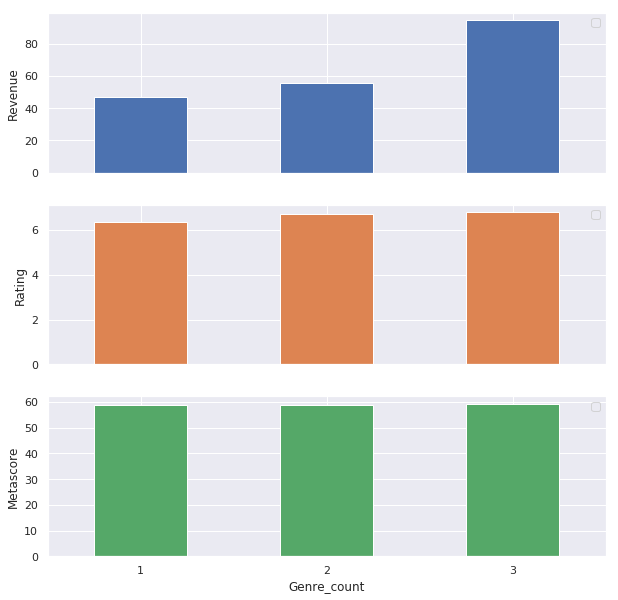

In [42]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

- It is observed that the revenue increases with increase in the Genre count. On average,movies with 3 Genres tends to earn double the revenue than movies with only 1 Genre.
- Although slightly, but both the IMDB Rating and Metascore are on the rise when Genre count increases.


<a id='section4022'></a>
#### 4.2.2Which Genre combination bring higher Revenue, higher rating and higher Metascore for a movie?
Since we know that a Genre count of 3 brings the best outcome for a movie, lets find out which combination of 3 Genres earns more Revenue, rating and critical acclaim.

In [39]:
genre_3_movies = project_data[project_data.Genre_count == 3]
genre_3_movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre_count
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,3
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,3
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,3


In [40]:
genre_3_movies = genre_3_movies.groupby('Genre')['Revenue', 'Rating', 'Metascore'].mean()
genre_3_movies.head()

,Revenue,Rating,Metascore
Genre,,,
"Action,Adventure,Biography",16.500000,7.000000,62.500000
"Action,Adventure,Comedy",95.733571,6.592857,47.214286
"Action,Adventure,Crime",90.620000,6.433333,48.333333
"Action,Adventure,Drama",81.487647,6.441176,53.411765
"Action,Adventure,Family",96.646250,5.575000,39.500000


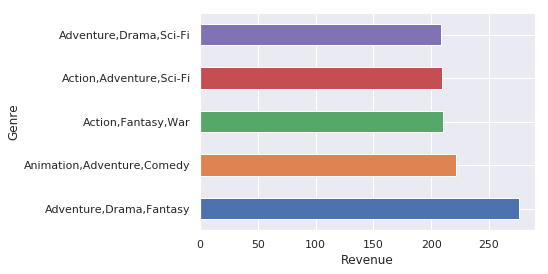

In [41]:
ax = genre_3_movies.Revenue.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('Revenue');

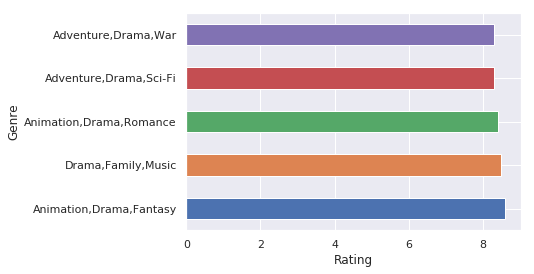

In [42]:
ax = genre_3_movies.Rating.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('Rating');

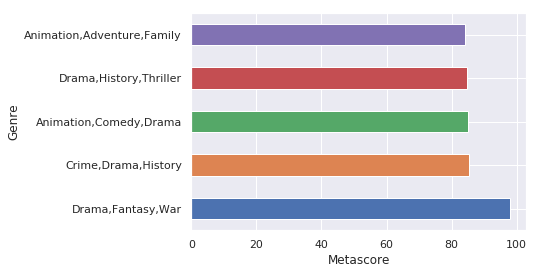

In [43]:
ax = genre_3_movies.Metascore.sort_values(ascending=False).head(5).plot.barh();
ax.set_xlabel('Metascore');

The following points can be noted from the above observations:-
- The combination of Genres: Animation, Drama and Fantasy produces the highest Revenue and has most rating as well. 
- while Drama, Fantasy and War is highly popular among the critics.

<a id='section403'></a>
#### 4.3 How does the runtime of movies affect the outcome of the movie?

In [44]:
# Find out the percentiles of the Runtime column
project_data.Runtime.describe()

count    936.000000
mean     113.272436
std       18.550798
min       66.000000
25%      100.000000
50%      111.000000
75%      123.000000
max      187.000000
Name: Runtime, dtype: float64

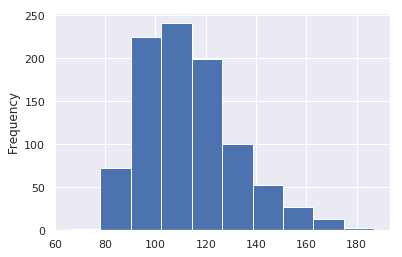

In [45]:
# Plot the distribution of the runtime column
project_data.Runtime.plot.hist()

Let us now classify the Runtime into different levels based on the ouput from the above describe method

> | Runtime(in minutes) | Level     |
|---------|-----------------|
|   66-100  | Short|
| 100-111   |Medium|
| 111-123   | Moderately Long|
| 123-187   | Long|

In [46]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
project_data['Runtime_levels'] = pd.cut(project_data.Runtime, runtime_bin_edges, labels=runtime_bin_names)
project_data.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre_count,Runtime_levels
Title,,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3,Moderately Long
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,3,Long
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2,Moderately Long
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3,Medium
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,3,Moderately Long


#### Let us now change the order of the columns

In [47]:
df=project_data[['Rank','Genre','Description','Director','Actors','Year','Runtime','Runtime_levels','Rating','Votes','Revenue','Metascore']]
df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Runtime_levels,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,Moderately Long,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,Long,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,Moderately Long,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,Medium,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,Moderately Long,6.2,393727,325.02,40.0


In [48]:
#Finding the count of different Runtime_levels
df['Runtime_levels'].value_counts()

Short              252
Long               232
Medium             230
Moderately Long    221
Name: Runtime_levels, dtype: int64

Text(0.5, 1.0, 'Donut Plot showing the different Runtime levels')

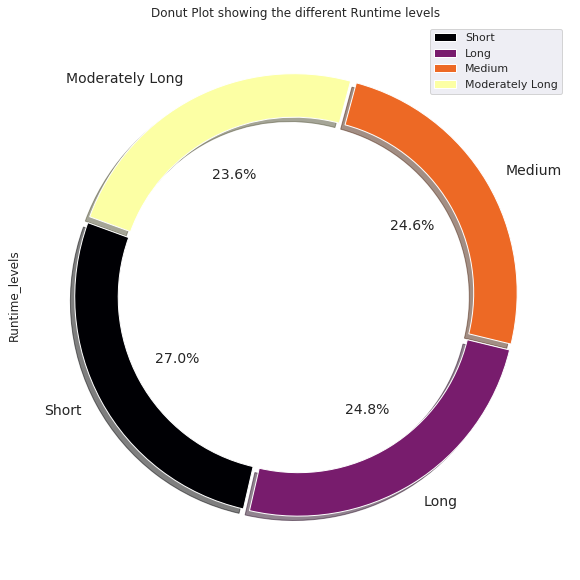

In [54]:
# Plot the count of different Runtime levels in percentile
# Using pandas plot function to plot a donut plot of the Runtime_levels column.
# Using kind='pie' to plot a donut plot, also setting explode values so that it takes a donut shape instead of a pie shape.
import numpy as np
space = np.ones(4)/50
df['Runtime_levels'].value_counts().plot(kind='pie',explode=space,fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('Runtime_levels')
plt.title('Donut Plot showing the different Runtime levels')

<a id='section4031'></a>
#### 4.3.1 Which interval of Runtime receives higher revenue,rating and metascore ?

In [55]:
# Finding the Runtime level that receives the highest mean revenue, mean Rating and mean Metascore
runtime_stats = df.groupby('Runtime_levels')['Revenue', 'Rating', 'Metascore'].mean()
runtime_stats

,Revenue,Rating,Metascore
Runtime_levels,,,
Short,58.164940,6.327381,56.456349
Medium,66.974196,6.579130,55.273913
Moderately Long,66.366244,6.848869,59.276018
Long,132.925733,7.195690,65.021552


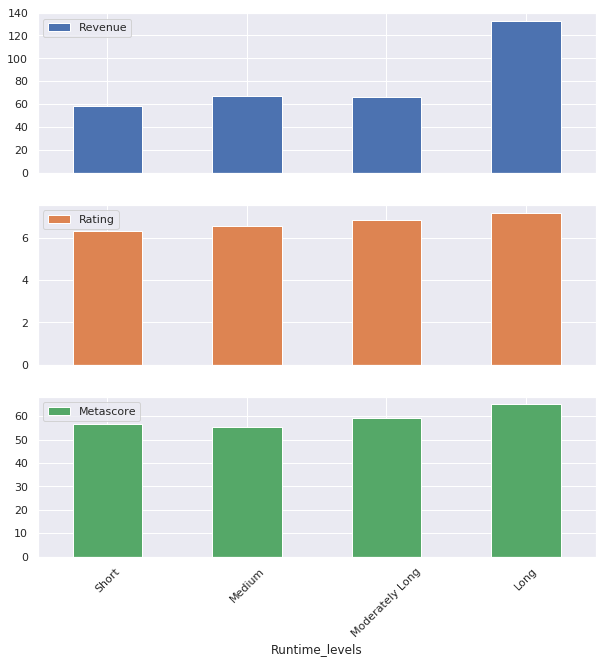

In [58]:
# Plot the above results
ax1, ax2, ax3 = runtime_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax3.set_xticklabels(runtime_stats.index, rotation = 45);

The following points can be noted from the above observations:-
- In general, movies that have Long Runtimes (greater than 123 minutes) have higher revenue, more popularity and are critically acclaimed as well.
- It is also noted that, movies with long Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.

<a id='section404'></a>
#### 4.4 what is the impact of directors on the movie?

<a id='section4041'></a>
#### 4.4.1which director's movies receive higher Revenue?

In [59]:
# let us find the number of movies directed by each director over the 10 year period
project_data.Director.value_counts().head(10)

Ridley Scott          8
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
M. Night Shyamalan    6
Denis Villeneuve      5
David Fincher         5
Zack Snyder           5
Christopher Nolan     5
Martin Scorsese       5
Name: Director, dtype: int64

In [60]:
# Find out the top 5 directors by Revenue
revenue_directors = project_data.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
top_5_revenue_directors

,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Gary Ross,408.000,1


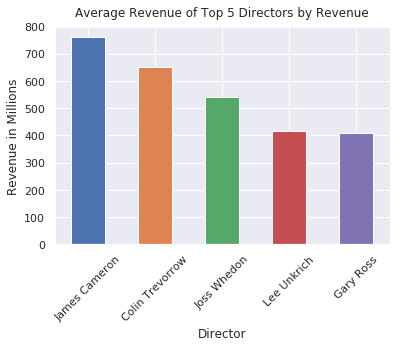

In [61]:
# Plot the result
ax = top_5_revenue_directors['Revenue'].plot.bar();
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index,rotation=45);

<a id='section4042'></a>
#### 4.4.2 which director's movies receive higher Rating?

In [62]:
rating_directors = project_data.groupby('Director').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_rating_directors

,Rating,Movies Count
Director,,
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Aamir Khan,8.50,1
Florian Henckel von Donnersmarck,8.50,1


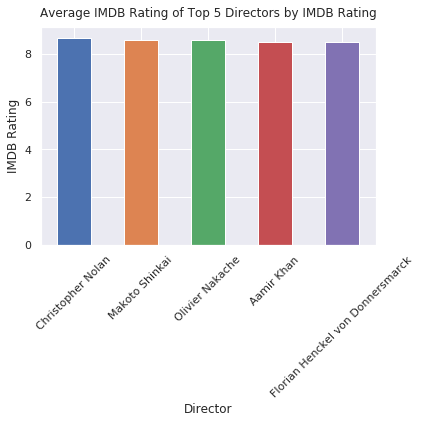

In [64]:
# Plot the result
ax = top_5_rating_directors['Rating'].plot.bar();
ax.set_ylabel('IMDB Rating')
ax.set_title('Average IMDB Rating of Top 5 Directors by IMDB Rating', y=1.02)
ax.set_xticklabels(top_5_rating_directors.index, rotation = 45);

<a id='section4043'></a>
#### 4.4.3 Does a particular director's movies receive higher Metacritic score ?

In [65]:
# Find out the top 5 directors by Metacritic Score
meta_directors = project_data.groupby('Director').agg({'Metascore': 'mean', 'Rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

,Metascore,Movies Count
Director,,
Barry Jenkins,99.0,1
Kenneth Lonergan,96.0,1
Todd Haynes,95.0,1
Kathryn Bigelow,94.5,2
Michael Goi,94.0,1


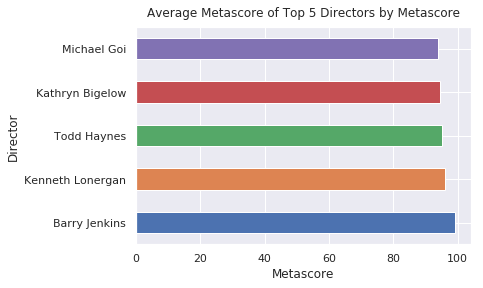

In [69]:
# Plot the result
ax = top_5_meta_directors['Metascore'].plot.barh();
ax.set_xlabel('Metascore')
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02)
ax.set_yticklabels(top_5_meta_directors.index);

The above observations shows the top 5 Directors in terms of Revenue, Rating and Metascore.


In [70]:
# Let us also find the list of all directors who have directed total number of movies more than or equal 5.
most_active_directors = project_data['Director'].value_counts()[project_data['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
M. Night Shyamalan    6
Denis Villeneuve      5
David Fincher         5
Zack Snyder           5
Christopher Nolan     5
Martin Scorsese       5
J.J. Abrams           5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Antoine Fuqua         5
Justin Lin            5
Name: Director, dtype: int64

In [71]:
# Find out the movies of these active directors
active_director_movies = df[df.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Runtime_levels,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,Long,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,Moderately Long,7.3,157606,138.12,62.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,Long,7.5,232072,234.02,66.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,Moderately Long,8.0,340798,100.50,81.0
Resident Evil: The Final Chapter,35,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,Medium,5.6,46165,26.84,49.0


In [72]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('Director')['Revenue', 'Rating', 'Metascore'].mean()
active_director_stats

,Revenue,Rating,Metascore
Director,,,
Antoine Fuqua,78.642000,7.040000,52.400000
Christopher Nolan,303.018000,8.680000,74.800000
Danny Boyle,36.680000,7.420000,75.000000
David Fincher,105.544000,7.820000,78.600000
David Yates,271.751667,7.433333,68.500000
Denis Villeneuve,43.242000,7.760000,75.600000
J.J. Abrams,336.690000,7.580000,74.600000
Justin Lin,164.958000,6.820000,57.200000
M. Night Shyamalan,69.745833,5.533333,40.000000


In [73]:
# Lets find out the top 5 active directors by average revenue
top_5_active_directors_by_revenue = active_director_stats.sort_values('Revenue', ascending=False)
top_5_active_directors_by_revenue[:5]

,Revenue,Rating,Metascore
Director,,,
J.J. Abrams,336.690000,7.580000,74.600000
Christopher Nolan,303.018000,8.680000,74.800000
David Yates,271.751667,7.433333,68.500000
Michael Bay,236.886667,6.483333,43.833333
Zack Snyder,195.148000,7.040000,48.000000


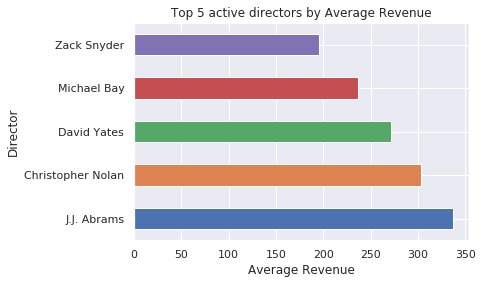

In [74]:
#plot the result
ax = top_5_active_directors_by_revenue[:5].Revenue.plot.barh();
ax.set_title("Top 5 active directors by Average Revenue")
ax.set_xlabel('Average Revenue');

In [75]:
# Lets find out the top 5 active directors by average rating
top_5_active_directors_by_rating = active_director_stats.sort_values('Rating', ascending=False)
top_5_active_directors_by_rating[:5]

,Revenue,Rating,Metascore
Director,,,
Christopher Nolan,303.018,8.68,74.8
Martin Scorsese,91.622,7.92,77.0
David Fincher,105.544,7.82,78.6
Denis Villeneuve,43.242,7.76,75.6
J.J. Abrams,336.690,7.58,74.6


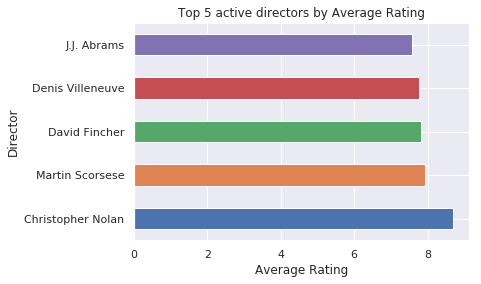

In [78]:
# plot the result
ax = top_5_active_directors_by_rating[:5].Rating.plot.barh();
ax.set_title("Top 5 active directors by Average Rating")
ax.set_xlabel('Average Rating');

In [79]:
# Lets find out the top 5 active directors by average metascore
top_5_active_directors_by_metascore = active_director_stats.sort_values('Metascore', ascending=False)
top_5_active_directors_by_metascore[:5]

,Revenue,Rating,Metascore
Director,,,
David Fincher,105.544,7.82,78.6
Martin Scorsese,91.622,7.92,77.0
Denis Villeneuve,43.242,7.76,75.6
Danny Boyle,36.680,7.42,75.0
Christopher Nolan,303.018,8.68,74.8


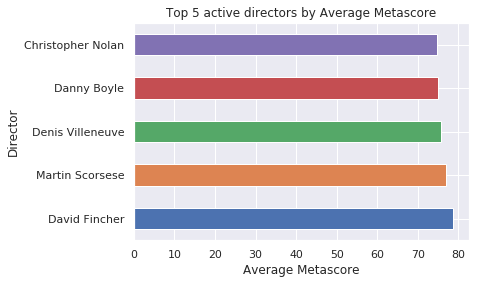

In [77]:
# plot the result
ax = top_5_active_directors_by_metascore[:5].Metascore.plot.barh();
ax.set_title("Top 5 active directors by Average Metascore")
ax.set_xlabel('Average Metascore');

##### In section 4.1  we observed 
-significant increase(more than twice) in the movies produced in  the year 2016 in compararision with the year 2015.
-increase in total revenue from movies while decrease in average revenue.
-drastic decrease in the popularity of movies in terms of IMbd rating.
So, let us dig deeper into the characteristics of movies in 2006and 2016 and compare them.  

In [80]:
#find the Genre count of movies produced in 2016
project_data.query('Year == 2016').Genre_count.value_counts()

3    157
2     64
1     47
Name: Genre_count, dtype: int64

In [81]:
project_data.query('Year == 2016').Genre.value_counts().head(10)

Drama                         23
Comedy                        13
Comedy,Drama                  10
Horror,Thriller               10
Animation,Adventure,Comedy     9
Action,Adventure,Fantasy       7
Comedy,Drama,Romance           7
Action,Adventure,Sci-Fi        7
Action,Crime,Drama             7
Crime,Drama,Thriller           7
Name: Genre, dtype: int64

The 3 most popular Genre combinations are (as found in section 4.2.2):
1. 'Animation,Drama, Fantasy'
2. 'Drama,Family,Music'
3. 'Animation,Comedy,Drama'

Let's analyze the movie counts of these Genre combinations in 2016

In [82]:
project_data.query('Year == 2016').Genre.value_counts().loc['Animation,Drama,Fantasy']

1

In [83]:
'Drama,Family,Music' in project_data.query('Year == 2016').Genre.value_counts().index

False

In [84]:
'Animation,Comedy,Drama' in project_data.query('Year == 2016').Genre.value_counts().index

True

In [85]:
project_data.query('Year == 2016').Genre.value_counts().loc['Animation,Comedy,Drama']

1

In section 4.3 we saw that movies with 'Long' runtime tends to get more IMDB Rating. So Let's analyze the runtime levels for movies in 2016

In [86]:
project_data.query('Year == 2016').Runtime_levels.value_counts()

Short              100
Medium              69
Moderately Long     53
Long                45
Name: Runtime_levels, dtype: int64

In [87]:
project_data.query('Year == 2006').Runtime_levels.value_counts()

Medium             16
Long               13
Moderately Long     9
Short               3
Name: Runtime_levels, dtype: int64

> ##### 1. So it seems the popularity of movies in terms of IMDB rating is decreasing because of fewer number of movies with the Genre combination that could earn more rating.
> ##### 2. Also the Runtime levels for movies in 2016 is more on the shorter sided. We have seen in section 4.2 that movies with 'Long' runtime level brings more rating.

<a id='section405'></a>
#### 4.5  Relationship between Revenue, Rating and Metascore of movies 

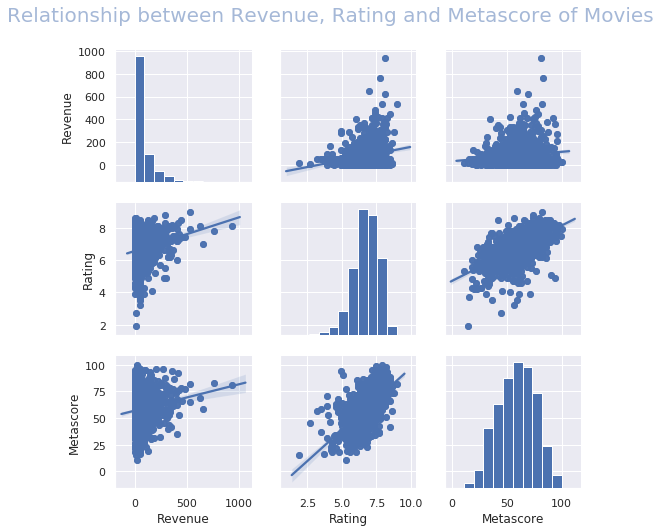

In [88]:
a=sns.pairplot(project_data, palette="muted",height=2.5,vars=['Revenue', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5);

> ##### We observe that Rating and Metascore have strong correlation. So it means the Registered users on IMDB and Critics on Metacritic tend to agree with each other for most movies.


<a id='section5'></a>
### 5. Conclusion
This section draws the conclusion from the exploration done on the dataset in Section 4.


<strong>Industry Growth</strong>
- The movie Industry is growing in terms of the total number of movies released and the total revenue gained year on year.
- However, the average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.
- The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.

<strong>Genre</Strong>
- The Revenue, Rating and Metascore of movies increases with the increase in Genre count.    
- Movies with Genre count of 3 has a significantly high revenue.
- The Genre 'Adventure' is most common for movies which bring more revenue and "Animation, Drama, Fantasy" is the Genre combination with the highest Revenue.
- The most popular Genre is 'Drama' and the Genre combination "Animation, Drama, Fantasy" earns the highest Rating.
- The Genre 'Drama' is also highly popular among the critics as well.The Genre combination "Drama, Fantasy, War" has the highest Metascore.
- The Genre 'Fantasy' and 'Drama' is most common for movies with high Revenue, Rating and Metascore.

<strong>Runtime</Strong>
- Movies with Long runtimes (> 123 minutes) earn more in terms of Revenue, Rating and Metascore. 
- Revenue is dramatically high for movies with Long runtimes.

<strong>Director</Strong>
- James Cameron is the director with the highest average Revenue. However he has directed only 1 movie in the 10 year period.
- Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period. 
- Barry Jenkins's movie has the highest Metascore. He too have directed only 1 movie in the 10 year period. 
- Among the most active directors, J J Abrams's movies earn highest in terms of Average Revenue.
- Christopher Nolan is the most popular active director in terms of Average Rating among people.
- Among the most active directors, critics favor David Fincher in terms of Average Metascore.

<strong>Rating of movies in General</strong>
- From the correlation graph, it is clear that People and Critics rate movies in a similar manner.
- In general, movies with higher rating and metascore tend to earn more revenue as well.


<a id='section6'></a>
### 6. Actionable Insights



1.<strong>Produce multiple movies with the best features</strong> - The movie Industry is on the rise and growing fast. More and more movies are released every year and the competition is very high. As the Revenue is distributed among the movies released, the average revenue of movies year on year is decreasing.So, production of  more movies using the best features (explained below) will be a good strategy achieving maximum benefits.

2.<strong>Produce movies with 3 Genre combination</strong> - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. As these Genres are most popular in terms of Rating and Metascore and also earns higher Revenue.

3.<strong>Produce movies that have Long runtimes</strong> - Runtime greater than 2 hrs.


4.<strong>Produce movies with active directors</strong> - Director's making multiple movies. For instance, Christopher Nolan movies is certain to bring in more Revenue, Rating and Metascore.

5.<strong>Produce movies that will satisfy both People and Critics</strong> - These movies will earn higher Revenue more often than not.
